<h1>A two-day workshop at the DJI, Munich 2019:<br> Meta-Analysis in Social Research<span class="tocSkip"></span></h1>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preliminaries" data-toc-modified-id="Preliminaries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preliminaries</a></span></li><li><span><a href="#Exercise-(BCG)" data-toc-modified-id="Exercise-(BCG)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exercise (BCG)</a></span></li><li><span><a href="#Exercise-(Raudenbush)" data-toc-modified-id="Exercise-(Raudenbush)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exercise (Raudenbush)</a></span></li></ul></div>

## Preliminaries

Please do not touch anything in this section, otherwise this notebook might not work properly. You have been warned! Also, if you have no clue what you are staring at, please consult our [Preface chapter](1-1_preface.ipynb).

In [1]:
source("run_me_first.R")

Loading required package: Matrix
Loading 'metafor' package (version 2.0-0). For an overview 
and introduction to the package please type: help(metafor).


## Exercise (BCG)

Open the BCG data, estimate a random effects model and check which studies can be considered outliers. Use the (a) outlier table: which study has the highest cook’s d value, (b) plot cook’s d and (c) provide an interpretation of the normal-quartile plot.

In [2]:
## Solution.
library(metafor)
dat.bcg <- escalc(measure = "RR", ai = tpos, bi = tneg, ci = cpos, di = cneg, data = dat.bcg)
res <- (rma(yi, vi, data=dat.bcg, digits=3) )
res


Random-Effects Model (k = 13; tau^2 estimator: REML)

tau^2 (estimated amount of total heterogeneity): 0.313 (SE = 0.166)
tau (square root of estimated tau^2 value):      0.560
I^2 (total heterogeneity / total variability):   92.22%
H^2 (total variability / sampling variability):  12.86

Test for Heterogeneity: 
Q(df = 12) = 152.233, p-val < .001

Model Results:

estimate     se    zval   pval   ci.lb   ci.ub     
  -0.715  0.180  -3.974  <.001  -1.067  -0.362  ***

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


In [3]:
## Solution.
inf <- influence(res)
inf

   rstudent dffits cook.d cov.r tau2.del  QE.del   hat weight   dfbs inf
1    -0.218 -0.041  0.002 1.116    0.336 151.583 0.051  5.059 -0.040    
2    -1.292 -0.344  0.113 1.010    0.293 145.318 0.064  6.365 -0.346    
3    -0.755 -0.160  0.026 1.067    0.321 150.197 0.044  4.436 -0.160    
4    -1.451 -0.520  0.229 0.965    0.263  96.563 0.097  9.699 -0.514    
5     0.848  0.271  0.076 1.138    0.328 151.320 0.089  8.868  0.271    
6    -0.118 -0.019  0.000 1.241    0.360 128.187 0.101 10.096 -0.019    
7    -1.304 -0.336  0.109 1.008    0.293 145.830 0.060  6.027 -0.339    
8     1.450  0.477  0.199 1.001    0.273  67.986 0.102 10.189  0.471    
9     0.408  0.142  0.022 1.197    0.349 152.205 0.087  8.743  0.142    
10   -1.128 -0.349  0.117 1.051    0.299 139.827 0.084  8.368 -0.349    
11    0.669  0.232  0.058 1.186    0.340 151.466 0.099  9.925  0.233    
12    1.290  0.253  0.063 1.026    0.308 150.787 0.038  3.822  0.254    
13    1.188  0.355  0.123 1.065    0.304 149.788 0.

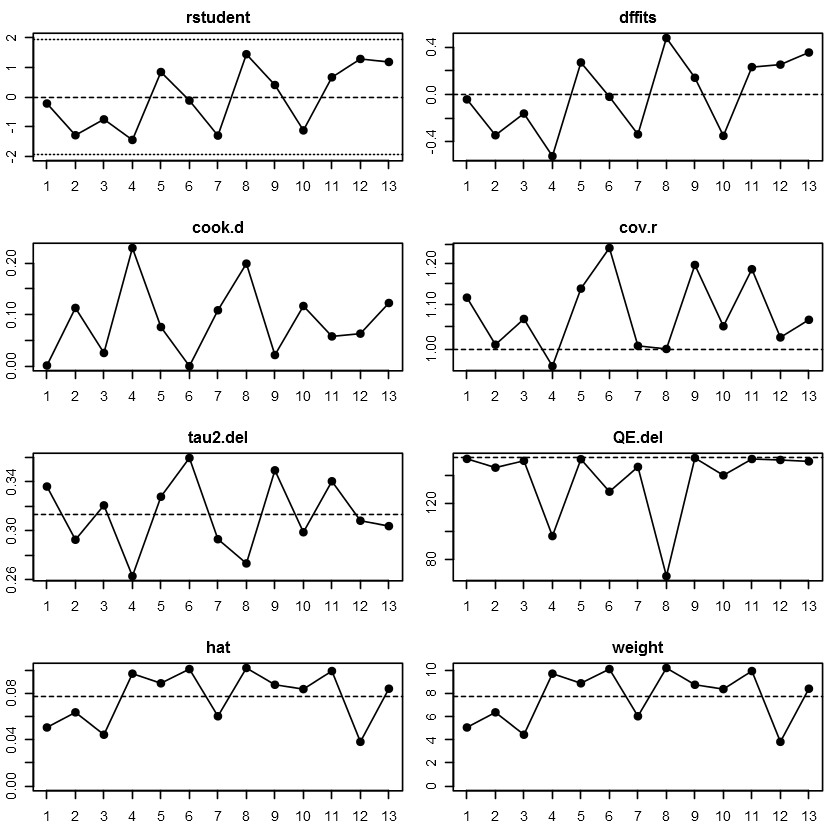

In [4]:
### Solution.
### Plot influence diagnostics.
plot(inf)

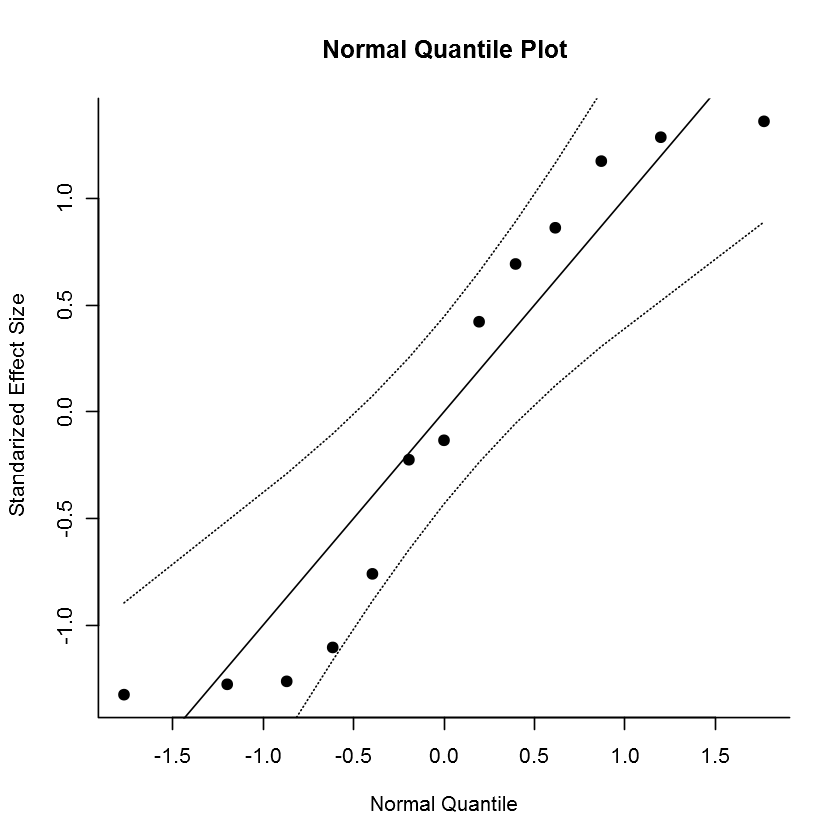

In [5]:
## Solution.
## Normal Quantile Plot: Plotting the quartiles of the effect size distribution against 
## the quartiles of the normal distribution.
qqnorm(res, type = "rstandard", pch = 19, envelope = TRUE, bonferroni = FALSE, 
       reps = 1000, smooth = TRUE, bass = 0, label = FALSE, offset = 0.3,
       main = "Normal Quantile Plot", xlab = "Normal Quantile", 
       ylab = "Standarized Effect Size")

## Exercise (Raudenbush)

Open the ` dat.raudenbush1985` (can also be found in `metafor`), estimate a random effects model and check which studies can be considered outliers. Use the (a) outlier table: which study has the highest cook’s d value, (b) plot cook’s d and (c) provide an interpretation of the normal-quartile plot.

In [6]:
## Solution.
## Random effects Model
## Random effects Model
library(metafor)
res <- (rma(yi, vi, data = dat.raudenbush1985, digits=3, 
            slab = paste(dat.raudenbush1985$author, ", ", 
                         dat.raudenbush1985$year)))

In [7]:
## Solution.
### estimate influence diagnostics
inf <- influence(res)
inf

### Interpretation ###
## Studentized residual: Rule of thumb: should not be larger than 3 -> study 4 and 10 are 
## probably outliers 
## cook's d: shouldn’t  be 3 times larger than mean -> study 10 is an outlier 
## we should exclude study 10

                             rstudent dffits cook.d cov.r tau2.del QE.del   hat
Rosenthal et al. ,  1974       -0.303 -0.200  0.050 1.297    0.027 35.765 0.077
Conn et al. ,  1968             0.146 -0.060  0.004 1.245    0.026 35.654 0.066
Jose & Cody ,  1971            -1.053 -0.290  0.087 1.107    0.021 34.319 0.057
Pellegrini & Hicks ,  1972.1    2.907  0.521  0.253 0.737    0.008 26.730 0.017
Pellegrini & Hicks ,  1972.2    0.448  0.043  0.002 1.043    0.020 35.534 0.017
Evans & Rosenthal ,  1969      -0.834 -0.323  0.121 1.222    0.024 34.267 0.091
Fielder et al. ,  1971         -0.596 -0.280  0.098 1.290    0.026 35.133 0.091
Claiborn ,  1969               -1.611 -0.270  0.070 0.971    0.016 32.756 0.040
Kester ,  1969                  0.912  0.244  0.058 1.035    0.018 34.111 0.058
Maxwell ,  1970                 2.903  0.787  0.497 0.593    0.003 26.959 0.033
Carter ,  1970                  1.429  0.283  0.077 0.923    0.015 33.270 0.024
Flowers ,  1966                 0.357  0

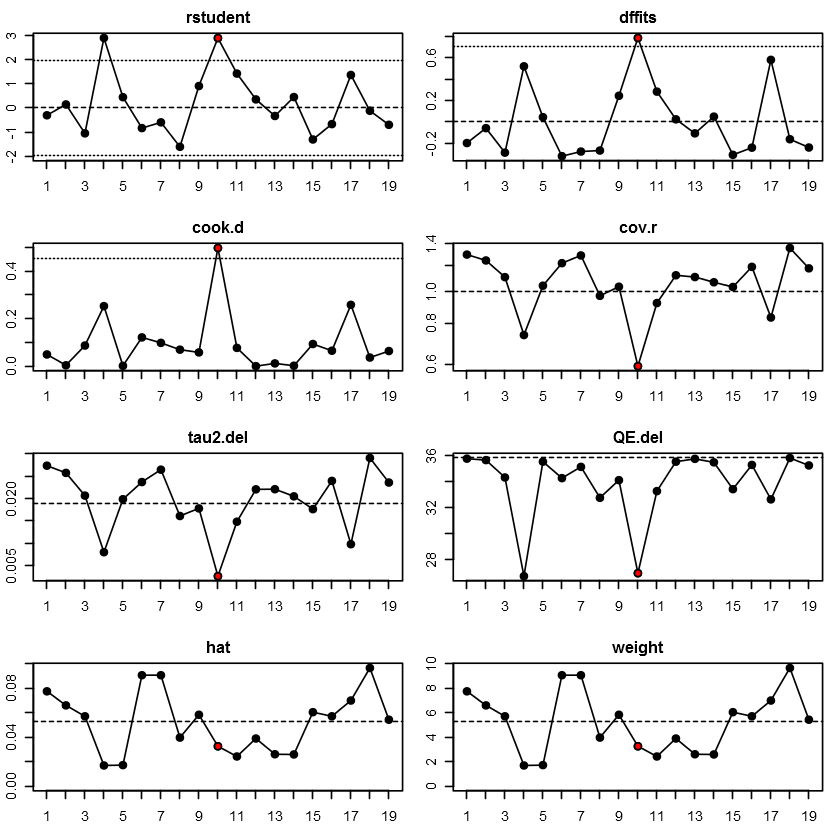

In [8]:
## Solution.
### plot the influence diagnostics
plot(inf)

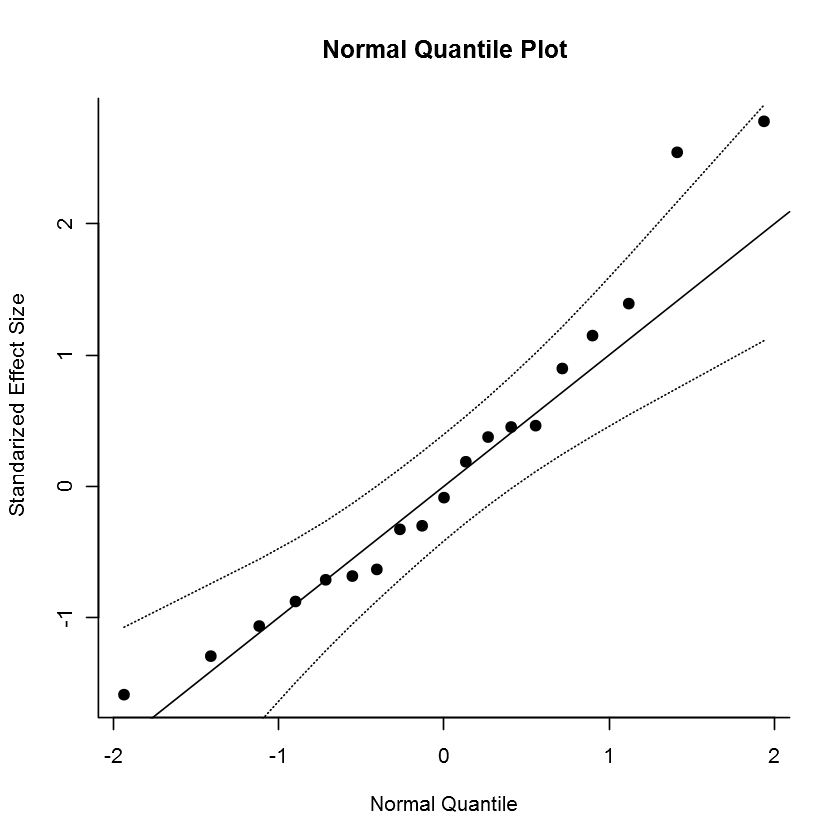

In [9]:
## Solution.
## Normal Quantile Plot: Plotting the quartiles of the effect size distribution against 
## the quartiles of the normal distribution.
qqnorm(res, type = "rstandard", pch = 19, envelope = TRUE, bonferroni = FALSE, 
       reps = 1000, smooth = TRUE, bass = 0, label = FALSE, offset = 0.3,
       main = "Normal Quantile Plot", xlab = "Normal Quantile", 
       ylab = "Standarized Effect Size")